# Taller 2
En el presente jupyter notebook se va realizar el desarrollo del primer taller de la materia de maestría "Introducción en ciencia de datos" de la universidad Tecnológica de pereira.

## Cómo iniciar a usar este proyecto?
- Debe tener [python](https://www.python.org/downloads/) instalado.
- Luego ejecute la siguiente linea desde terminal (Debe estar ubicado en el directorio root de este proyecto).

    ```shell
    pip install pipenv
    ```
- Ahora escriba la siguiente línea en el terminal.

    ```shell
    pipenv install
    ```
- Ajuste su IDE para seleccionar como interprete el nuevo ambiente virtual.

Autor: Diego Alejandro Moreno Gallón<br>
Ing Eléctrico<br>
Universidad Tecnológica de Pereira

In [2]:
import numpy as np
import pandas as pd

Describan brevemente la composición de su base de datos indicando qué fenómeno está siendo descrito. Algunas preguntas gu ́ıas son: ¿Sus datos son estructurados o no estructurados? ¿En qué tipo de archivo est ́an contenidos sus datos? ¿Es necesario el empleo de un parser para extraer la información? ¿Cuál es la tipolog ́ıa de las variables (i.e., cualitativas o cuantitativas, nominales u ordinales, discretas o continuas, etc.)?

In [2]:
df_tables = []

for num in range(8, 22):
    if num < 10:
        filename = '0' + str(num) + '.csv'
    else:
        filename = str(num) + '.csv'
    path = f'./../data_raw/nofetal20{filename}'
    print(path)
    df_aux = pd.read_csv(path,
                        sep=',',
                        encoding='latin-1')
    df_tables.append(df_aux)
    del df_aux
    

./../data_raw/nofetal2008.csv


C:\Users\diego\AppData\Local\Temp\ipykernel_26944\103653783.py:9: DtypeWarning: Columns (18,53,55,57,59,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(path,


./../data_raw/nofetal2009.csv
./../data_raw/nofetal2010.csv


C:\Users\diego\AppData\Local\Temp\ipykernel_26944\103653783.py:9: DtypeWarning: Columns (55,57,59,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(path,


./../data_raw/nofetal2011.csv
./../data_raw/nofetal2012.csv


C:\Users\diego\AppData\Local\Temp\ipykernel_26944\103653783.py:9: DtypeWarning: Columns (11,12,23,38,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(path,


./../data_raw/nofetal2013.csv


C:\Users\diego\AppData\Local\Temp\ipykernel_26944\103653783.py:9: DtypeWarning: Columns (11,12,23,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(path,


./../data_raw/nofetal2014.csv
./../data_raw/nofetal2015.csv


C:\Users\diego\AppData\Local\Temp\ipykernel_26944\103653783.py:9: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(path,


./../data_raw/nofetal2016.csv
./../data_raw/nofetal2017.csv


C:\Users\diego\AppData\Local\Temp\ipykernel_26944\103653783.py:9: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(path,


./../data_raw/nofetal2018.csv


C:\Users\diego\AppData\Local\Temp\ipykernel_26944\103653783.py:9: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(path,


./../data_raw/nofetal2019.csv
./../data_raw/nofetal2020.csv
./../data_raw/nofetal2021.csv


In [3]:
pos = 0
for df, num in zip(df_tables, range(8, 22)):
    if num < 10:
        year_num = '0' + str(num)
    else:
        year_num = str(num)
    print(f'Year: 20{year_num} Rows: {df.shape[0]} Columns: {df.shape[1]}')
    if pos < len(df_tables)-1:
        set_aux = set(df_tables[pos].columns)
        pos += 1
        set_symmetric_difference = set_aux.symmetric_difference(set(df_tables[pos].columns))
        print(f'Symmetric difference: {set_symmetric_difference}')

Year: 2008 Rows: 196943 Columns: 68
Symmetric difference: set()
Year: 2009 Rows: 196933 Columns: 68
Symmetric difference: set()
Year: 2010 Rows: 200524 Columns: 68
Symmetric difference: set()
Year: 2011 Rows: 195823 Columns: 68
Symmetric difference: {'IDADMISALU', 'CAUSA_667', 'IDCLASADMI', 'Unnamed: 0', 'T_GES_AGRU_CIE', 'NOM_INST', 'COD_INST', 'IDADMISALUD'}
Year: 2012 Rows: 199756 Columns: 70
Symmetric difference: set()
Year: 2013 Rows: 203071 Columns: 70
Symmetric difference: {'IDADMISALU', 'CAUSA_667', 'IDCLASADMI', 'Unnamed: 0', 'T_GES_AGRU_CIE', 'NOM_INST', 'COD_INST', 'IDADMISALUD'}
Year: 2014 Rows: 210051 Columns: 68
Symmetric difference: set()
Year: 2015 Rows: 219472 Columns: 68
Symmetric difference: set()
Year: 2016 Rows: 223078 Columns: 68
Symmetric difference: set()
Year: 2017 Rows: 227624 Columns: 68
Symmetric difference: set()
Year: 2018 Rows: 236932 Columns: 68
Symmetric difference: {'C_ANT32', 'C_DIR1', 'P_PMAN_IRIS', 'C_PAT2', 'CAUSA_666', 'C_ANT2', 'C_ANT3', 'MAN_MUE

Se puede encontrar que para cada uno de los años de la base de datos se tienen diferentes cantidades de variables y para el caso del análisis se van a tomar como referencia las variables del año con menor cantidad de NaN. Para esto se debe hacer un dataframe que condense todos los datos que se tienen 

In [4]:
for pos in range(len(df_tables)-1, -1, -1):
    if len(df_tables)-1 == pos:
        df_raw = df_tables[pos]
        df_raw = df_raw.astype(str)
    else:
        df_aux = df_tables[pos]
        df_aux = df_aux.astype(str)
        df_raw = pd.merge(df_aux, df_raw, how='outer')
del df_aux, df_tables
for col in df_raw.columns:
    df_raw[col] = df_raw[col].replace('nan', np.nan)
df_raw

,COD_DPTO,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,...,CAUSA_667,IDPROFCER,CAU_HOMOL,Unnamed: 0,COD_INST,NOM_INST,IDADMISALU,IDCLASADMI,P_PMAN_IRIS,CAUSA_MULT
0,68,1,1,1,NaN,2,2008,2,4,0.0,...,503,1.0,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68,1,1,1,NaN,2,2008,2,8,15.0,...,303,1.0,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68,1,1,1,NaN,2,2008,2,7,50.0,...,302,1.0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68,1,1,1,NaN,2,2008,2,1,45.0,...,610,1.0,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68,1,1,1,NaN,2,2008,2,2,0.0,...,609,1.0,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218499,68,276,1,1,NaN,2,2021,8,2.0,55.0,...,608,1,66,NaN,NaN,NaN,NaN,NaN,0,I469/R688/K729/K746
3218500,76,111,1,1,NaN,2,2021,8,2.0,55.0,...,109,1,10,NaN,NaN,NaN,NaN,NaN,0,J960/J159/U071*I64 I10 N40
3218501,17,1,1,1,NaN,2,2021,8,2.0,40.0,...,215,1,37,NaN,NaN,NaN,NaN,NaN,0,R090/J960/D381
3218502,76,1,1,3,NaN,2,2021,8,0.0,10.0,...,303,1,51,NaN,NaN,NaN,NaN,NaN,0,I219/I709*I10 E149


In [6]:
#df_raw.to_csv('./../data_raw/nofetal2008_2021.csv', index=False)

In [3]:
df_raw = pd.read_csv('./../data_raw/nofetal2008_2021.csv')
df_raw = df_raw.astype(str)
for col in df_raw.columns:
    df_raw[col] = df_raw[col].replace('nan', np.nan)
df_raw

C:\Users\diego\AppData\Local\Temp\ipykernel_26076\851517682.py:1: DtypeWarning: Columns (0,2,3,5,7,8,9,10,11,12,13,14,16,17,19,20,21,23,24,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,66,70,71,72,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('./../data_raw/nofetal2008_2021.csv')


,COD_DPTO,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,...,CAUSA_667,IDPROFCER,CAU_HOMOL,Unnamed: 0,COD_INST,NOM_INST,IDADMISALU,IDCLASADMI,P_PMAN_IRIS,CAUSA_MULT
0,68,1,1,1,NaN,2,2008,2,4,0.0,...,503.0,1.0,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68,1,1,1,NaN,2,2008,2,8,15.0,...,303.0,1.0,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68,1,1,1,NaN,2,2008,2,7,50.0,...,302.0,1.0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68,1,1,1,NaN,2,2008,2,1,45.0,...,610.0,1.0,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68,1,1,1,NaN,2,2008,2,2,0.0,...,609.0,1.0,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218499,68,276,1,1,NaN,2,2021,8,2.0,55.0,...,608.0,1,66,NaN,NaN,NaN,NaN,NaN,0.0,I469/R688/K729/K746
3218500,76,111,1,1,NaN,2,2021,8,2.0,55.0,...,109.0,1,10,NaN,NaN,NaN,NaN,NaN,0.0,J960/J159/U071*I64 I10 N40
3218501,17,1,1,1,NaN,2,2021,8,2.0,40.0,...,215.0,1,37,NaN,NaN,NaN,NaN,NaN,0.0,R090/J960/D381
3218502,76,1,1,3,NaN,2,2021,8,0.0,10.0,...,303.0,1,51,NaN,NaN,NaN,NaN,NaN,0.0,I219/I709*I10 E149


Vamos a sacar aparte las variables de C_MUERTE (A, B, C, D, E) que hacen referencia a cómo se determinó la causa de muerte y cada uno representa una sola variable y si existe o no. Por ende lo que se va hacer es que los NaN de estas variables se van a reemplazar por 0.

In [5]:
cols = ['C_MUERTE', 'C_MUERTEB', 'C_MUERTEC', 'C_MUERTED', 'C_MUERTEE']
df_raw[cols] = df_raw[cols].fillna(0)
del cols

In [6]:
def get_nan(df_raw):
    df_nan = df_raw.isna().sum()
    df_nan = df_nan[df_nan > 0]*100/df_raw.shape[0]
    df_nan = df_nan.sort_values(ascending=False)
    return df_nan
df_nan = get_nan(df_raw)
df_nan

C_MCM1            99.799130
C_ANT32           99.461644
C_DIR12           99.072737
C_ANT22           98.698153
C_ANT12           97.990744
OTRSITIODE        97.379714
T_GES_AGRU_CIE    97.293308
SIMUERTEPO        96.710149
T_GES             96.603422
TIPO_EMB          96.603391
MU_PARTO          96.603391
NIV_EDUM          96.603391
EST_CIVM          96.603391
T_PARTO           96.603391
C_PAT2            95.650899
EMB_MES           93.234434
EMB_SEM           93.105430
EMB_FAL           93.033471
MAN_MUER          89.556887
COD_INST          89.496797
NOM_INST          89.465323
IDCLASADMI        88.595012
IDADMISALU        88.594888
EDAD_MADRE        88.238014
CODMUNOC          87.644197
CODOCUR           87.619838
Unnamed: 0        87.484030
PESO_NAC          84.579513
C_ANT3            82.577433
C_PAT1            77.894854
P_PMAN_IRIS       71.778907
CAUSA_MULT        71.778907
C_ANT2            53.556683
N_HIJOSM          44.692596
N_HIJOSV          44.682001
C_ANT1            34

<Axes: >

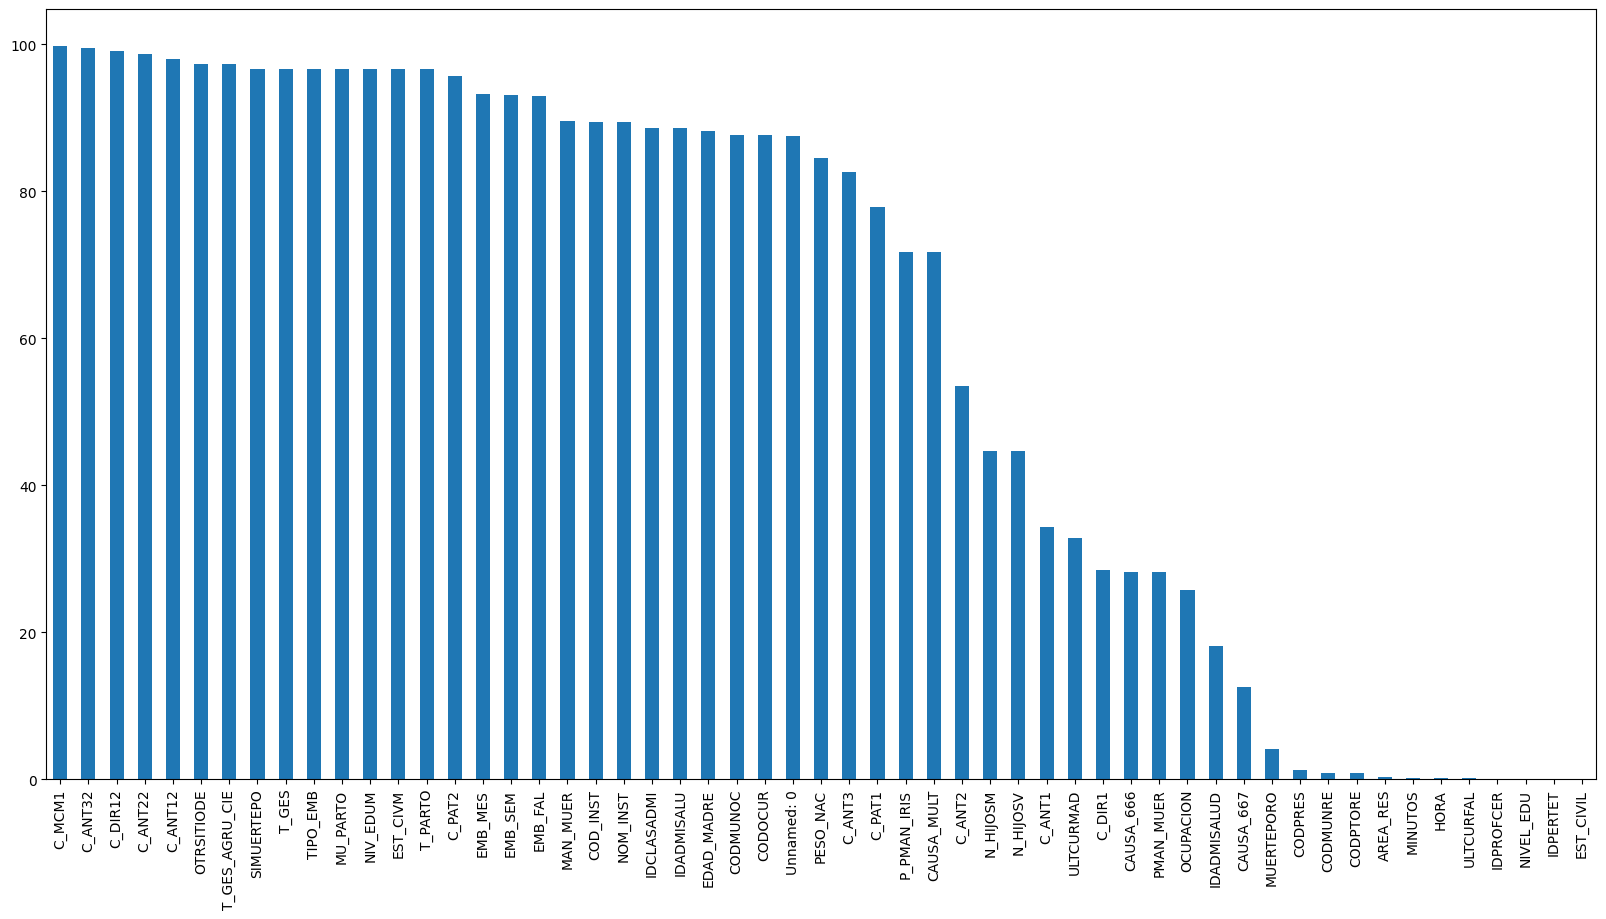

In [7]:
df_nan.plot(kind='bar', figsize=(20, 10))

In [8]:
temp = df_raw[['C_DIR1', 'C_ANT1', 'C_ANT2', 'C_ANT3']]
four_cols = temp[temp.isnull().sum(axis=1) == 4].shape[0]*100/df_raw.shape[0]
three_cols = temp[temp.isnull().sum(axis=1) == 3].shape[0]*100/df_raw.shape[0]
two_cols = temp[temp.isnull().sum(axis=1) == 2].shape[0]*100/df_raw.shape[0]
one_cols = temp[temp.isnull().sum(axis=1) == 1].shape[0]*100/df_raw.shape[0]
zero_cols = temp[temp.isnull().sum(axis=1) == 0].shape[0]*100/df_raw.shape[0]

print(f'Faltan datos en 4 de 4 columnas: {four_cols}%')
print(f'Faltan datos en 3 de 4 columnas: {three_cols}%')
print(f'Faltan datos en 2 de 4 columnas: {two_cols}%')
print(f'Faltan datos en 1 de 4 columnas: {one_cols}%')
print(f'Faltan datos en 0 de 4 columnas: {zero_cols}%')

Faltan datos en 4 de 4 columnas: 28.423143174592916%
Faltan datos en 3 de 4 columnas: 5.8435223321145475%
Faltan datos en 2 de 4 columnas: 19.278397665499252%
Faltan datos en 1 de 4 columnas: 29.08786193834154%
Faltan datos en 0 de 4 columnas: 17.367074889451747%


Esto quiere decir que podemos eliminar 28% de las muestras ya que no tienen causa registrada de muerte y si vamos más adelante C_ANT2 y C_ANT3 no nos da más información ya que si eliminamos estas variable seguiremos con un 28% de muestras con datos faltantes. Además estas variables tienen una falta de datos del 52% y el 85% respectivamente.

In [9]:
print(f'El numero de variables que tienen más de 50% de las variables es {len(df_nan[df_nan > 50])}.')

El numero de variables que tienen más de 50% de las variables es 33.


En general se tiene 33 variables con mas del 50% de valores en NaN y se procede a eliminar por la gran cantidad de valores faltantes.

In [10]:
df_raw = df_raw.drop(df_nan[df_nan > 50].index, axis=1)
df_nan = get_nan(df_raw)
df_nan

N_HIJOSM       44.692596
N_HIJOSV       44.682001
C_ANT1         34.310381
ULTCURMAD      32.824909
C_DIR1         28.423299
CAUSA_666      28.221093
PMAN_MUER      28.221093
OCUPACION      25.790895
IDADMISALUD    18.114472
CAUSA_667      12.515970
MUERTEPORO      4.106877
CODPRES         1.200589
CODMUNRE        0.893862
CODPTORE        0.803852
AREA_RES        0.311573
MINUTOS         0.238154
HORA            0.123971
ULTCURFAL       0.107068
IDPROFCER       0.000404
NIVEL_EDU       0.000217
IDPERTET        0.000186
EST_CIVIL       0.000031
dtype: float64

Hasta ahora se ve guardar el proceso que se lleva con la base de datos por lo que esta es muy pesada y re hacer todo el proceso puede demorar. Además se va proceder analizar las variables que quedan con una alta catidad de valores NaN.

<Axes: >

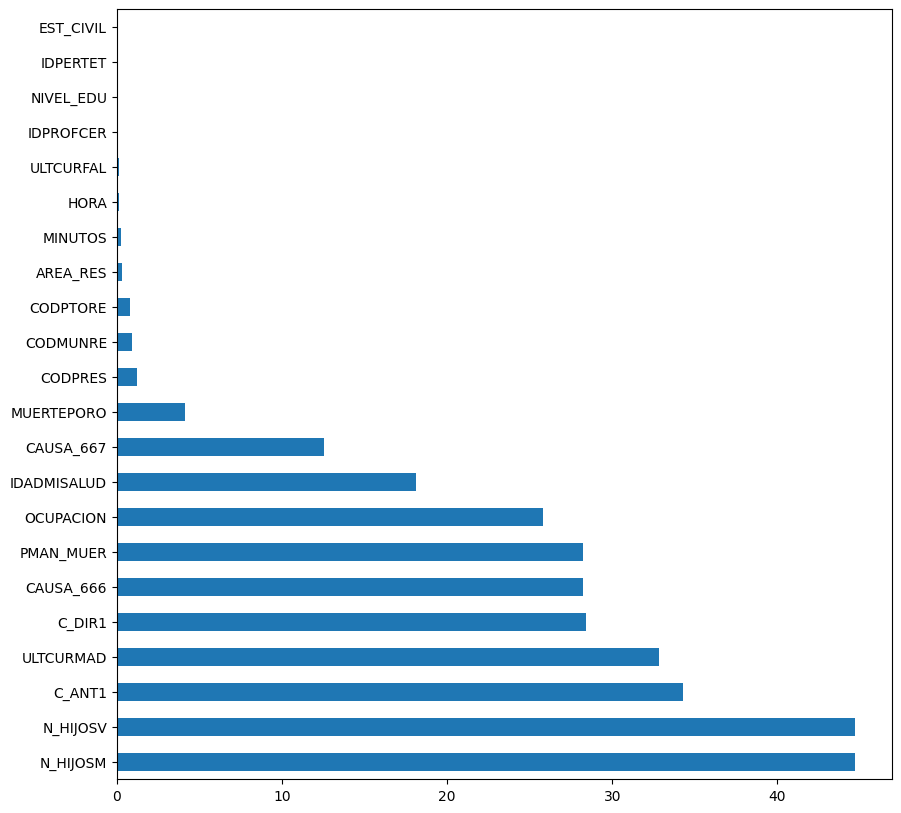

In [11]:
df_nan.plot(kind='barh', figsize=(10, 10))

In [12]:
del df_nan
#df_raw.to_csv('./../data_raw/nofetal2008_2021_2.csv', index=False)

In [33]:
df_raw = pd.read_csv('./../data_raw/nofetal2008_2021_2.csv')
df_raw

C:\Users\diego\AppData\Local\Temp\ipykernel_7632\449421912.py:1: DtypeWarning: Columns (0,2,3,4,6,7,8,9,10,11,12,13,15,17,18,19,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('./../data_raw/nofetal2008_2021_2.csv')


,COD_DPTO,COD_MUNIC,A_DEFUN,SIT_DEFUN,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,SEXO,...,C_MUERTED,C_MUERTEE,ASIS_MED,C_DIR1,C_ANT1,C_BAS1,CAUSA_666,CAUSA_667,IDPROFCER,CAU_HOMOL
0,68,1,1,1,2,2008,2,4,0.0,1,...,0.0,0.0,1,T794,K922,W189,503.0,503.0,1.0,93
1,68,1,1,1,2,2008,2,8,15.0,1,...,0.0,0.0,1,I249,I10X,I249,303.0,303.0,1.0,51
2,68,1,1,1,2,2008,2,7,50.0,1,...,0.0,0.0,9,R570,I119,I119,302.0,302.0,1.0,50
3,68,1,1,1,2,2008,2,1,45.0,1,...,0.0,0.0,1,R578,E878,N189,612.0,610.0,1.0,74
4,68,1,1,1,2,2008,2,2,0.0,1,...,0.0,0.0,1,A419,K659,K275,611.0,609.0,1.0,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218499,68,276,1,1,2,2021,8,2.0,55.0,1,...,0.0,0,1,NaN,NaN,K746,NaN,608.0,1,66
3218500,76,111,1,1,2,2021,8,2.0,55.0,1,...,0.0,0,1,NaN,NaN,U071,NaN,109.0,1,10
3218501,17,1,1,1,2,2021,8,2.0,40.0,1,...,0.0,0,1,NaN,NaN,D381,NaN,215.0,1,37
3218502,76,1,1,3,2,2021,8,0.0,10.0,1,...,1.0,0,1,NaN,NaN,I219,NaN,303.0,1,51


In [35]:
municipios = [' Valle del Cauca', 'Cauca', ' Cesar', 'Antioquia', 'BogotÃ¡',
       ' Meta', 'Quindio', ' Huila', ' Boyaca', ' Tolima', ' Bolivar',
       ' Cordoba', 'Caldas', ' AtlÃ¡ntico', ' Magdalena', ' Risaralda',
       'Cundinamarca', ' Norte de Santander', ' Arauca', ' Amazonas',
       ' Santander', 'Casanare', ' Sucre', 'NariÃ±o', ' Choco',
       'La guajira', 'Guaviare', ' Putumayo', 'Vichada', 'Caqueta',
       ' GuainÃ\xada',
       ' ArchipiÃ©lago de San AndrÃ©s, Providencia y Santa Catalina',
       'VaupÃ©s', 'Boyaca']
noMunicipio = [76, 19, 20, 5, 11, 50, 63, 41, 15, 73, 13,
               23, 17, 8, 47, 66, 25, 54, 81, 91, 68, 85,
               70, 52, 27, 44, 95, 86, 99, 18, 94, 88, 97, 15]

municipio_dict = dict(zip(municipios, noMunicipio))
df_raw['COD_DPTO'] = df_raw['COD_DPTO'].replace(municipio_dict)

In [36]:
print(df_raw['ANO'].unique())

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


In [8]:
temp = df_raw[['C_DIR1', 'C_ANT1']]
temp[temp.isnull().sum(axis=1) == 2].shape[0]*100/df_raw.shape[0]

28.4231742449287

Primero para revisar la informacion del número de hijos nacidos vivos y muertos tenemos que ver si solo las mujeres tienen esta información.

In [9]:
df_mujeres = df_raw[df_raw['SEXO'] == '2']
n_HM = df_mujeres[['N_HIJOSV']].isna().sum(axis=1)
n_HM = df_mujeres[['N_HIJOSM']].isna().sum(axis=1)

print(f'Faltan datos en Mujeres y N_HIJOSV: {n_HM[n_HM == 1].shape[0]*100/df_raw.shape[0]}%')
print(f'Faltan datos en Mujeres y N_HIJOSM: {n_HM[n_HM == 1].shape[0]*100/df_raw.shape[0]}%')


Faltan datos en Mujeres y N_HIJOSV: 0.04893577885874928%
Faltan datos en Mujeres y N_HIJOSM: 0.04893577885874928%


In [10]:
df_mujeres = df_raw[df_raw['SEXO'] == '1']
n_HM = df_mujeres[['N_HIJOSV']].isna().sum(axis=1)
n_HM = df_mujeres[['N_HIJOSM']].isna().sum(axis=1)

print(f'Faltan datos en Hombres y N_HIJOSV: {n_HM[n_HM == 1].shape[0]*100/df_raw.shape[0]}%')
print(f'Faltan datos en Hombres y N_HIJOSM: {n_HM[n_HM == 1].shape[0]*100/df_raw.shape[0]}%')

Faltan datos en Hombres y N_HIJOSV: 0.06431559507149906%
Faltan datos en Hombres y N_HIJOSM: 0.06431559507149906%


In [11]:
df_mujeres = df_raw[df_raw['SEXO'] == '99']
n_HM = df_mujeres[['N_HIJOSV']].isna().sum(axis=1)
n_HM = df_mujeres[['N_HIJOSM']].isna().sum(axis=1)

print(f'Faltan datos en Hombres y N_HIJOSV: {n_HM[n_HM == 1].shape[0]*100/df_raw.shape[0]}%')
print(f'Faltan datos en Hombres y N_HIJOSM: {n_HM[n_HM == 1].shape[0]*100/df_raw.shape[0]}%')

Faltan datos en Hombres y N_HIJOSV: 0.0%
Faltan datos en Hombres y N_HIJOSM: 0.0%


In [38]:
# Convertir las columnas COD_DPTO y COD_MUNIC a strings
df_raw['COD_DPTO'] = df_raw['COD_DPTO'].astype(str)
df_raw['COD_MUNIC'] = df_raw['COD_MUNIC'].astype(str)

# Rellenar con ceros a la izquierda la columna COD_MUNIC si no tiene longitud de 3
df_raw['COD_MUNIC'] = df_raw['COD_MUNIC'].apply(lambda x: x.zfill(3) if len(x) < 3 else x)

# Verificar los cambios
print(df_raw[['COD_DPTO', 'COD_MUNIC']].head())
df_raw['COD_DPTO_MUNIC'] = df_raw['COD_DPTO'] + df_raw['COD_MUNIC']
print(df_raw[['COD_DPTO_MUNIC']].head())

  COD_DPTO COD_MUNIC
0       68       001
1       68       001
2       68       001
3       68       001
4       68       001
  COD_DPTO_MUNIC
0          68001
1          68001
2          68001
3          68001
4          68001


In [39]:
df_dpto_mun = pd.read_excel('./../data_raw/cod_mun.xlsx')
df_dpto_mun['COD_DPTO_MUNIC'] = df_dpto_mun['COD_DPTO_MUNIC'].astype(str)
df_raw = pd.merge(df_raw, 
                  df_dpto_mun,
                  left_on=['COD_DPTO_MUNIC'], 
                  right_on=['COD_DPTO_MUNIC'])
df_raw = df_raw.drop(['COD_DPTO', 'COD_MUNIC', 'COD_DPTO_MUNIC'], axis=1)
df_raw


,A_DEFUN,SIT_DEFUN,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,SEXO,EST_CIVIL,GRU_ED1,...,ASIS_MED,C_DIR1,C_ANT1,C_BAS1,CAUSA_666,CAUSA_667,IDPROFCER,CAU_HOMOL,DEPARTAMENTO,MUNICIPIO
0,1,1,2,2008,2,4,0.0,1,4,25,...,1,T794,K922,W189,503.0,503.0,1.0,93,Santander,BUCARAMANGA
1,1,1,2,2008,2,8,15.0,1,9,22,...,1,I249,I10X,I249,303.0,303.0,1.0,51,Santander,BUCARAMANGA
2,1,1,2,2008,2,7,50.0,1,6,19,...,9,R570,I119,I119,302.0,302.0,1.0,50,Santander,BUCARAMANGA
3,1,1,2,2008,2,1,45.0,1,9,22,...,1,R578,E878,N189,612.0,610.0,1.0,74,Santander,BUCARAMANGA
4,1,1,2,2008,2,2,0.0,1,9,18,...,1,A419,K659,K275,611.0,609.0,1.0,63,Santander,BUCARAMANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218485,3,6,2,2021,9,16.0,15.0,1,9,18,...,2,NaN,NaN,X958,NaN,512.0,1,101,Guainia,MORICHAL
3218486,3,6,2,2021,9,4.0,45.0,1,5,13,...,2,NaN,NaN,X968,NaN,512.0,1,101,Guainia,MORICHAL
3218487,3,6,2,2021,9,4.0,45.0,2,5,12,...,2,NaN,NaN,X968,NaN,512.0,1,101,Guainia,MORICHAL
3218488,3,6,2,2021,9,4.0,45.0,2,5,11,...,2,NaN,NaN,X968,NaN,512.0,1,101,Guainia,MORICHAL


## Análisis univariado

A partir de este punto se va realizar una revisión univariada de algunas columnas de interes.

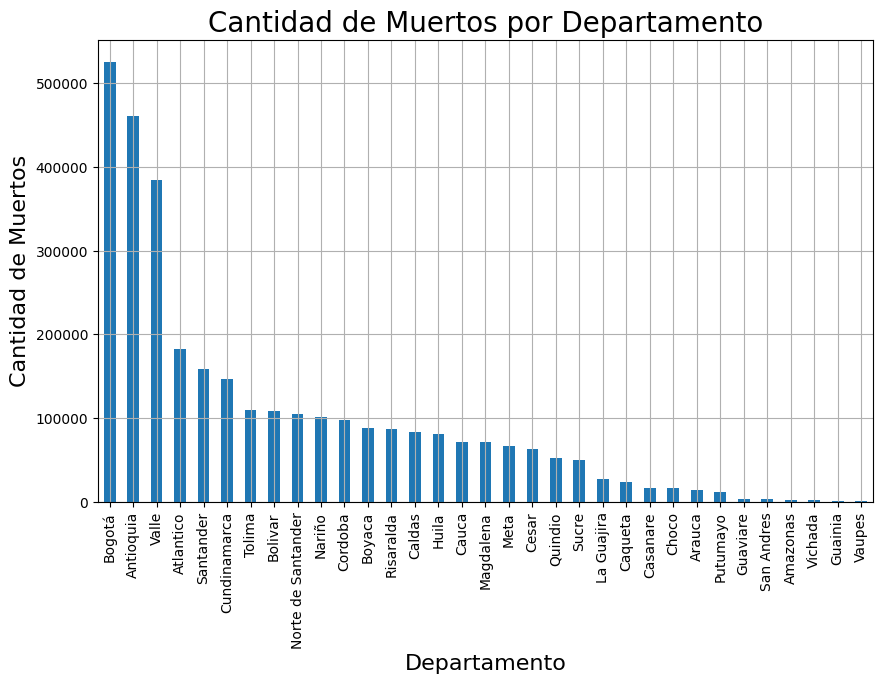

In [40]:
import matplotlib.pyplot as plt

# Suponiendo que df es tu DataFrame combinado
# Agrupar por departamento y sumar los muertos
muertos_por_departamento = df_raw.groupby('DEPARTAMENTO')['ANO'].count().sort_values(ascending=False)

# Crear una gráfica de barras
plt.figure(figsize=(10, 6))
muertos_por_departamento.plot(kind='bar')
plt.title('Cantidad de Muertos por Departamento', fontsize=20)
plt.xlabel('Departamento', fontdict={'fontsize': 16})
plt.ylabel('Cantidad de Muertos', fontdict={'fontsize': 16})
plt.xticks(rotation=90)  # Rota los nombres de los departamentos para mejor legibilidad
plt.grid()
plt.show()

Como se puede observas en la grafica y comparar con los [datos de poblacion](https://es.wikipedia.org/wiki/Anexo:Departamentos_de_Colombia_por_población) por departamento. Se logra observar que exceptuando Cundinamarca los primeros 5 puestos se comparten entre cantidad de muertos y la cantidad de la población (efectivamente sigue la densidad poblacional de las regiones). Ahora seria bueno crear una grafica desagregada por año para observar como es la muerte por año.

In [41]:
df_raw['ANO'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021], dtype=int64)

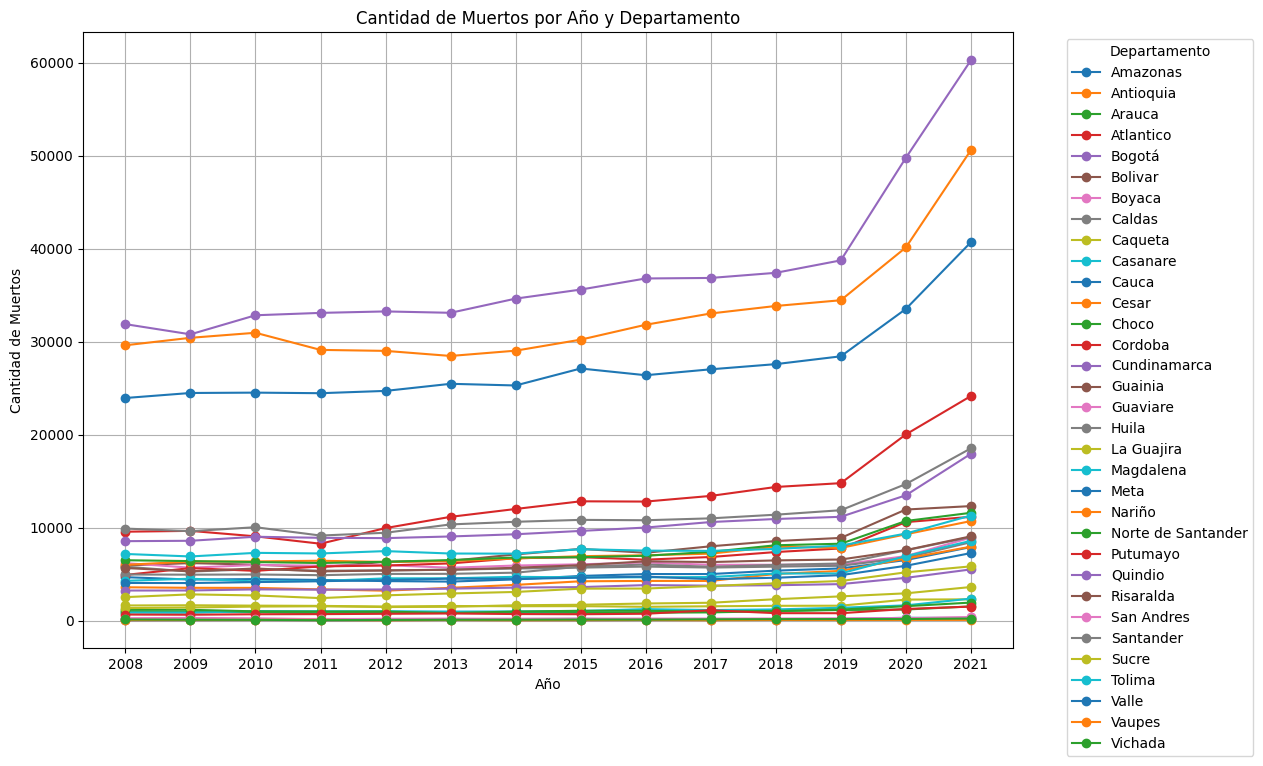

In [42]:
# Agrupar por año y departamento y sumar los muertos
#df_raw['ANO'] = df_raw['ANO'].astype(int)
muertos_por_año_departamento = df_raw.groupby(['ANO', 'DEPARTAMENTO'])['MES'].count().unstack()

# Crear una gráfica de líneas
plt.figure(figsize=(12, 8))
muertos_por_año_departamento.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Cantidad de Muertos por Año y Departamento')
plt.xlabel('Año')
plt.ylabel('Cantidad de Muertos')
plt.legend(title='Departamento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_raw['ANO'].unique())  # Asegúrate de que todos los años estén representados
plt.grid(True)
plt.show()


Al observar el comportamiento anual de las muertes se logra percibir un aumento lineal a traves de los años pero luego en el 2020 y en el 2021 se percibe un gran aumento de muertos en el pais. En estos años ocurre el la pantemia del covid-19 y es muy posible que el gran aumento de muertes por estas fechas pueden sean por dicho evento.

In [43]:
#df_raw.to_csv('./../data_raw/nofetal2008_2021_3.csv', index=False)

In [3]:
df_raw = pd.read_csv('./../data_raw/nofetal2008_2021_3.csv')
df_raw

C:\Users\diego\AppData\Local\Temp\ipykernel_21488\187292064.py:1: DtypeWarning: Columns (0,1,2,4,5,6,7,8,9,10,11,13,15,16,17,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('./../data_raw/nofetal2008_2021_3.csv')


,A_DEFUN,SIT_DEFUN,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,SEXO,EST_CIVIL,GRU_ED1,...,ASIS_MED,C_DIR1,C_ANT1,C_BAS1,CAUSA_666,CAUSA_667,IDPROFCER,CAU_HOMOL,DEPARTAMENTO,MUNICIPIO
0,1,1,2,2008,2,4,0.0,1,4,25,...,1,T794,K922,W189,503.0,503.0,1.0,93,Santander,BUCARAMANGA
1,1,1,2,2008,2,8,15.0,1,9,22,...,1,I249,I10X,I249,303.0,303.0,1.0,51,Santander,BUCARAMANGA
2,1,1,2,2008,2,7,50.0,1,6,19,...,9,R570,I119,I119,302.0,302.0,1.0,50,Santander,BUCARAMANGA
3,1,1,2,2008,2,1,45.0,1,9,22,...,1,R578,E878,N189,612.0,610.0,1.0,74,Santander,BUCARAMANGA
4,1,1,2,2008,2,2,0.0,1,9,18,...,1,A419,K659,K275,611.0,609.0,1.0,63,Santander,BUCARAMANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218485,3,6,2,2021,9,16.0,15.0,1,9,18,...,2,NaN,NaN,X958,NaN,512.0,1,101,Guainia,MORICHAL
3218486,3,6,2,2021,9,4.0,45.0,1,5,13,...,2,NaN,NaN,X968,NaN,512.0,1,101,Guainia,MORICHAL
3218487,3,6,2,2021,9,4.0,45.0,2,5,12,...,2,NaN,NaN,X968,NaN,512.0,1,101,Guainia,MORICHAL
3218488,3,6,2,2021,9,4.0,45.0,2,5,11,...,2,NaN,NaN,X968,NaN,512.0,1,101,Guainia,MORICHAL


In [4]:
# Quiero guardar la informacion del 2017 al 2021
#df_aux = df_raw[df_raw['ANO'] >= 2015]
#df_aux.to_csv('./../data_raw/nofetal2015_2021.csv', index=False)

In [5]:
df_raw['SEXO'].unique()

values_sex = ['1', '2', '3', ' Masculino', ' Femenino', 'Indeterminado', 1, 2, 3]
target_sex = ['MASCULINO', 'FEMENINO', 'INDETERMINADO']*3

sexo = dict(zip(values_sex, target_sex))
df_raw['SEXO'] = df_raw['SEXO'].replace(sexo)
del sexo, values_sex, target_sex

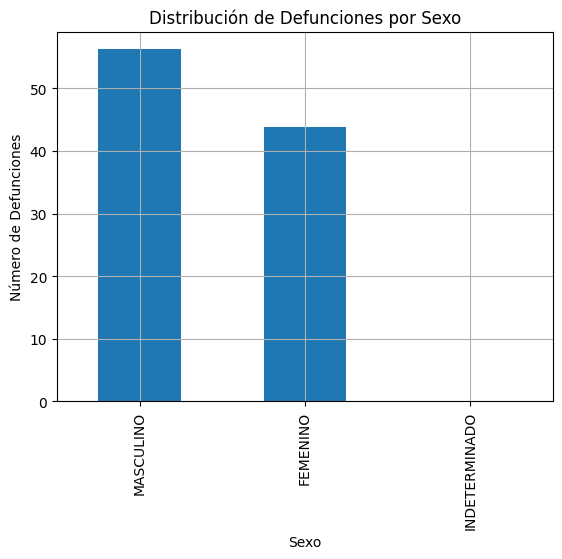

In [6]:
import matplotlib.pyplot as plt

# Análisis por sexo (asumiendo que 'M' representa masculino y 'F' femenino)
sexo_distribucion = df_raw['SEXO'].value_counts()
sexo_distribucion = sexo_distribucion * 100 / sexo_distribucion.sum()
sexo_distribucion.plot(kind='bar')
plt.title('Distribución de Defunciones por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Defunciones')
plt.grid()
plt.show()


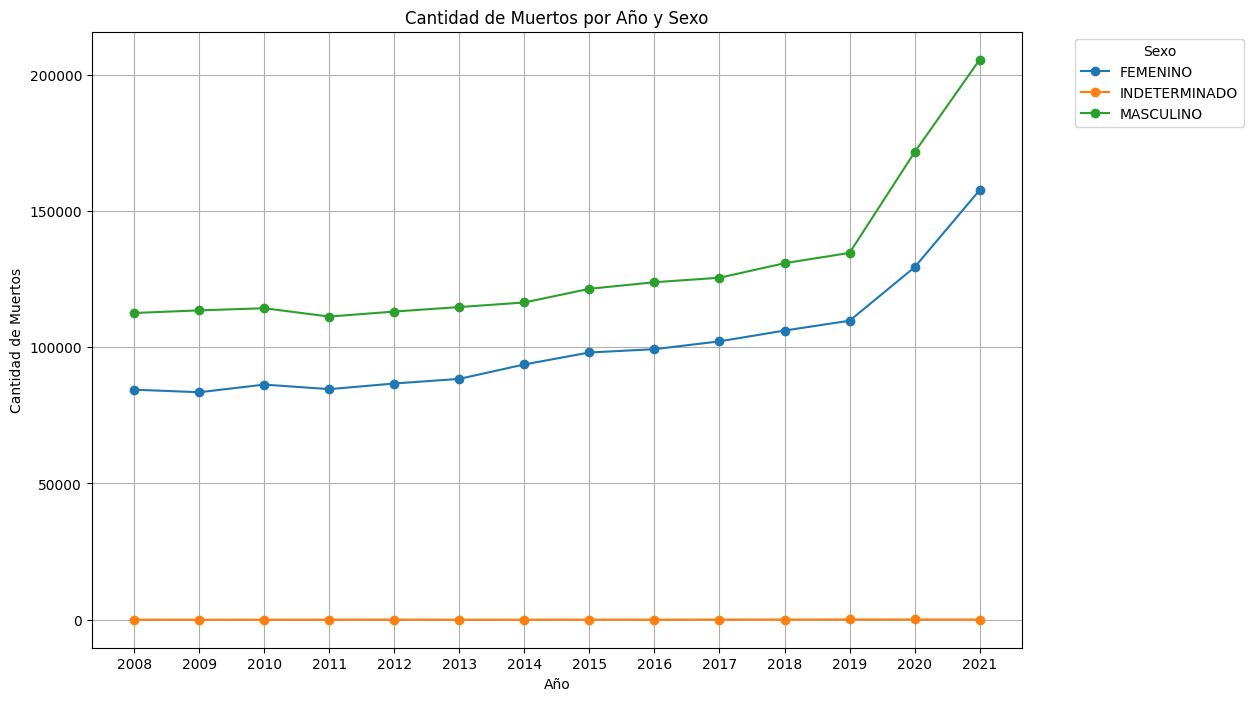

In [7]:
muertos_por_año_sexo = df_raw.groupby(['ANO', 'SEXO'])['MES'].count().unstack()

# Crear una gráfica de líneas
plt.figure(figsize=(12, 8))
muertos_por_año_sexo.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Cantidad de Muertos por Año y Sexo')
plt.xlabel('Año')
plt.ylabel('Cantidad de Muertos')
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_raw['ANO'].unique())  # Asegúrate de que todos los años estén representados
plt.grid(True)
plt.show()

In [8]:
categorias_educativas = {
    '1': 'PREESCOLAR',
    '2': 'BASICA PRIMARIA',
    '3': 'BASICA SECUNDARIA',
    '4': 'MEDIA ACADEMICA O CLASICA',
    '5': 'MEDIA TECNICA',
    '6': 'NORMALISTA',
    '7': 'TECNICA PROFESIONAL',
    '8': 'TECNOLOGICA',
    '9': 'PROFESIONAL',
    '10': 'ESPECIALIZACION',
    '11': 'MAESTRIA',
    '12': 'DOCTORADO',
    '13': 'NINGUNO',
    '99': 'SIN INFORMACION',
    '99.0': 'SIN INFORMACION',
    'Ninguno': 'NINGUNO',
    'BÃ¡sica primaria': 'BASICA PRIMARIA',
    'Sin informaciÃ³n': 'SIN INFORMACION',
    'Preescolar': 'PREESCOLAR',
    'BÃ¡sica secundaria': 'BASICA SECUNDARIA',
    'TÃ©cnica profesional': 'TECNICA PROFESIONAL',
    'Profesional': 'PROFESIONAL',
    'Media tÃ©cnica': 'MEDIA TECNICA',
    'EspecializaciÃ³n': 'ESPECIALIZACION',
    'Media acadÃ©mica o clÃ¡sica': 'MEDIA ACADEMICA O CLASICA',
    'TecnolÃ³gica': 'TECNOLOGICA',
    'Normalista': 'NORMALISTA',
    'MaestrÃ\xada': 'MAESTRIA',
    'Doctorado': 'DOCTORADO',
    1: 'PREESCOLAR',
    2: 'BASICA PRIMARIA',
    3: 'BASICA SECUNDARIA',
    4: 'MEDIA ACADEMICA O CLASICA',
    5: 'MEDIA TECNICA',
    6: 'NORMALISTA',
    7: 'TECNICA PROFESIONAL',
    8: 'TECNOLOGICA',
    9: 'PROFESIONAL',
    10: 'ESPECIALIZACION',
    11: 'MAESTRIA',
    12: 'DOCTORADO',
    13: 'NINGUNO',
    99: 'SIN INFORMACION',
    99.0: 'SIN INFORMACION',
    '1.0': 'PREESCOLAR',
    '2.0': 'BASICA PRIMARIA',
    '3.0': 'BASICA SECUNDARIA',
    '4.0': 'MEDIA ACADEMICA O CLASICA',
    '5.0': 'MEDIA TECNICA',
    '6.0': 'NORMALISTA',
    '7.0': 'TECNICA PROFESIONAL',
    '8.0': 'TECNOLOGICA',
    '9.0': 'PROFESIONAL',
    '10.0': 'ESPECIALIZACION',
    '11.0': 'MAESTRIA',
    '12.0': 'DOCTORADO',
    '13.0': 'NINGUNO',
    '99.0': 'SIN INFORMACION',
}

df_raw['NIVEL_EDU'] = df_raw['NIVEL_EDU'].replace(categorias_educativas)

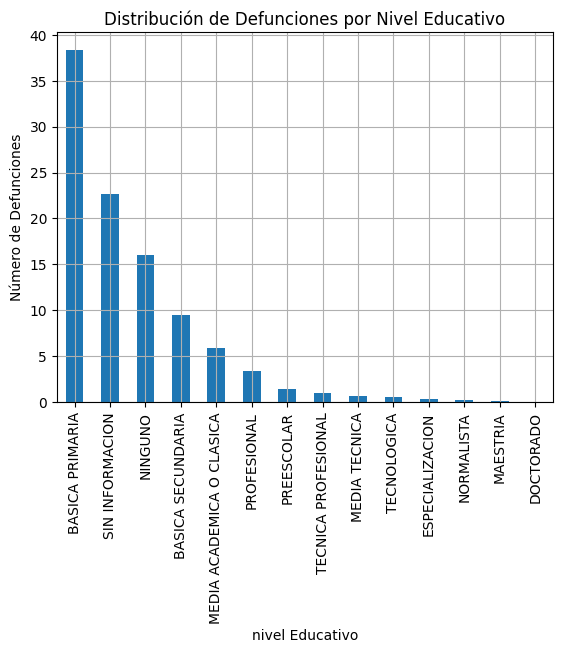

In [9]:
nivel_edu_distribucion = df_raw['NIVEL_EDU'].value_counts()

(nivel_edu_distribucion * 100 / nivel_edu_distribucion.sum()).plot(kind='bar')
plt.title('Distribución de Defunciones por Nivel Educativo')
plt.xlabel('nivel Educativo')
plt.ylabel('Número de Defunciones')
plt.grid()
plt.show()

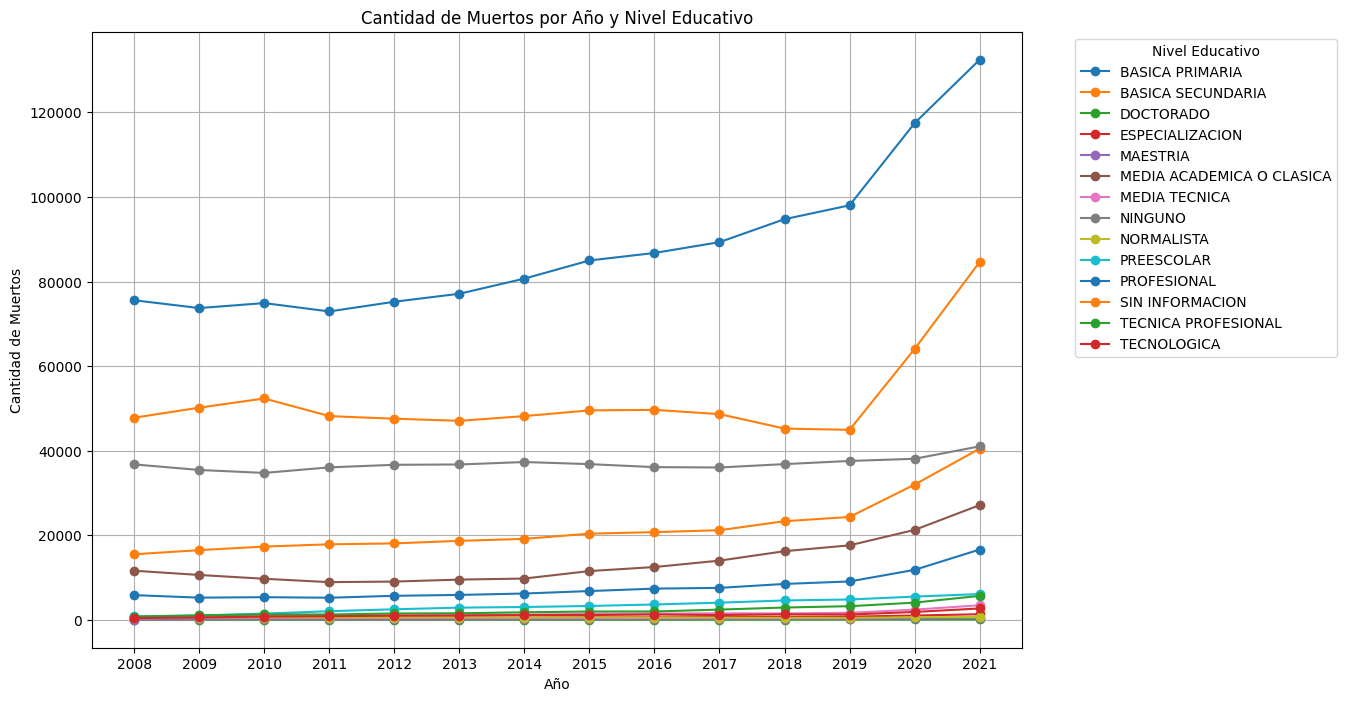

In [10]:
muertos_por_año_edu = df_raw.groupby(['ANO', 'NIVEL_EDU'])['MES'].count().unstack()

# Crear una gráfica de líneas
plt.figure(figsize=(12, 8))
muertos_por_año_edu.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Cantidad de Muertos por Año y Nivel Educativo')
plt.xlabel('Año')
plt.ylabel('Cantidad de Muertos')
plt.legend(title='Nivel Educativo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_raw['ANO'].unique())  # Asegúrate de que todos los años estén representados
plt.grid(True)
plt.show()

Casi el 80% de los muertos desde el 2008 al 2022 son persona con educacion BASICA PRIMARIA, SIN INFORMACION, NINGUNO, BASICA SECUNDARIA y MEDIA ACADEMICA O CLASICA. Al parecer la gente que fue mas afectada por el covid fueron personas con estudios BASICA PRIMARIA y BASICA SECUNDARIA.

In [11]:
df_raw['EST_CIVIL'].unique()

array(['4', '9', '6', '5', '3', '1', '2', 'Estaba casado(a)',
       'Estaba viudo(a)', 'Estaba soltero(a)', 'Sin informaciÃ³n',
       'Estaba separado(a), divorciado(a)',
       'No estaba casado(a) y llevaba dos o mÃ¡s aÃ±os viviendo con su',
       'No estaba casado(a) y llevaba menos de dos aÃ±os viviendo con',
       6.0, 4.0, 9.0, 1.0, 5.0, 2.0, 3.0, '5.0', '6.0', '4.0', '9.0',
       '1.0', '3.0', '2.0', nan], dtype=object)

Como no hay valores bien estandarizados se procede a limpiar e imputar.

In [12]:
categorias_estado_civil = {
    '1': 'NO ESTABA CASADO(A) Y LLEVABA DOS O MAS AÑOS VIVIENDO CON SU PAREJA',
    '2': 'NO ESTABA CASADO(A) Y LLEVABA MENOS DE DOS AÑOS VIVIENDO CON SU PAREJA',
    '3': 'ESTABA SEPARADO(A), DIVORCIADO(A)',
    '4': 'ESTABA VIUDO(A)',
    '5': 'ESTABA SOLTERO(A)',
    '6': 'ESTABA CASADO(A)',
    '9': 'SIN INFORMACION',
    'Estaba casado(a)': 'ESTABA CASADO(A)',
    'Estaba viudo(a)': 'ESTABA VIUDO(A)',
    'Estaba soltero(a)': 'ESTABA SOLTERO(A)',
    'Sin informaciÃ³n': 'SIN INFORMACION',
    'Estaba separado(a), divorciado(a)': 'ESTABA SEPARADO(A), DIVORCIADO(A)',
    'No estaba casado(a) y llevaba dos o mÃ¡s aÃ±os viviendo con su': 'NO ESTABA CASADO(A) Y LLEVABA DOS O MAS AÑOS VIVIENDO CON SU PAREJA',
    'No estaba casado(a) y llevaba menos de dos aÃ±os viviendo con': 'NO ESTABA CASADO(A) Y LLEVABA MENOS DE DOS AÑOS VIVIENDO CON SU PAREJA',
    '1.0': 'NO ESTABA CASADO(A) Y LLEVABA DOS O MAS AÑOS VIVIENDO CON SU PAREJA',
    '2.0': 'NO ESTABA CASADO(A) Y LLEVABA MENOS DE DOS AÑOS VIVIENDO CON SU PAREJA',
    '3.0': 'ESTABA SEPARADO(A), DIVORCIADO(A)',
    '4.0': 'ESTABA VIUDO(A)',
    '5.0': 'ESTABA SOLTERO(A)',
    '6.0': 'ESTABA CASADO(A)',
    '9.0': 'SIN INFORMACION',
    1.0: 'NO ESTABA CASADO(A) Y LLEVABA DOS O MAS AÑOS VIVIENDO CON SU PAREJA',
    2.0: 'NO ESTABA CASADO(A) Y LLEVABA MENOS DE DOS AÑOS VIVIENDO CON SU PAREJA',
    3.0: 'ESTABA SEPARADO(A), DIVORCIADO(A)',
    4.0: 'ESTABA VIUDO(A)',
    5.0: 'ESTABA SOLTERO(A)',
    6.0: 'ESTABA CASADO(A)',
    9.0: 'SIN INFORMACION',
}

df_raw['EST_CIVIL'] = df_raw['EST_CIVIL'].replace(categorias_estado_civil)

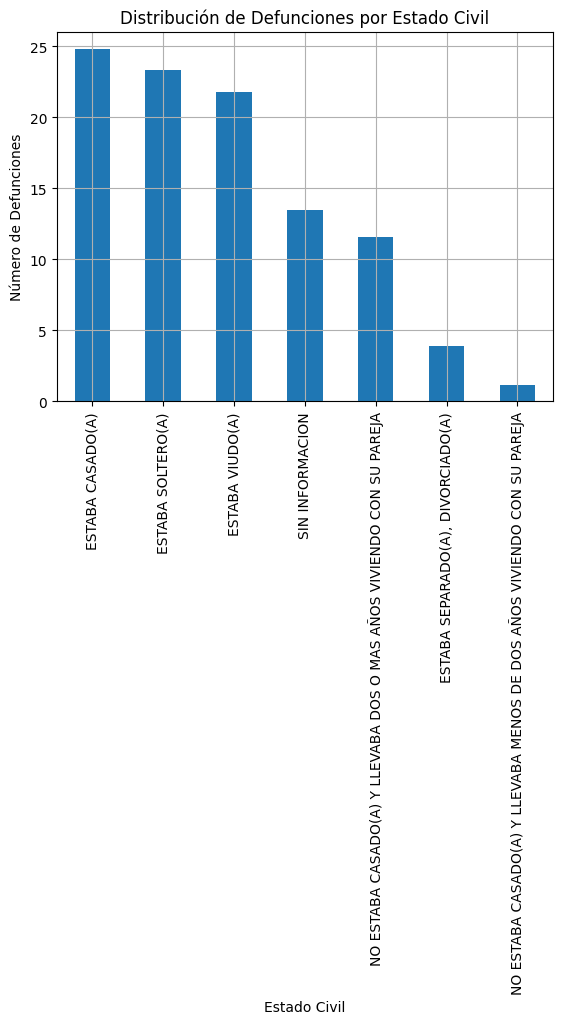

In [13]:
nivel_edu_estcivil = df_raw['EST_CIVIL'].value_counts()

(nivel_edu_estcivil * 100 / nivel_edu_estcivil.sum()).plot(kind='bar')
plt.title('Distribución de Defunciones por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Defunciones')
plt.grid()
plt.show()

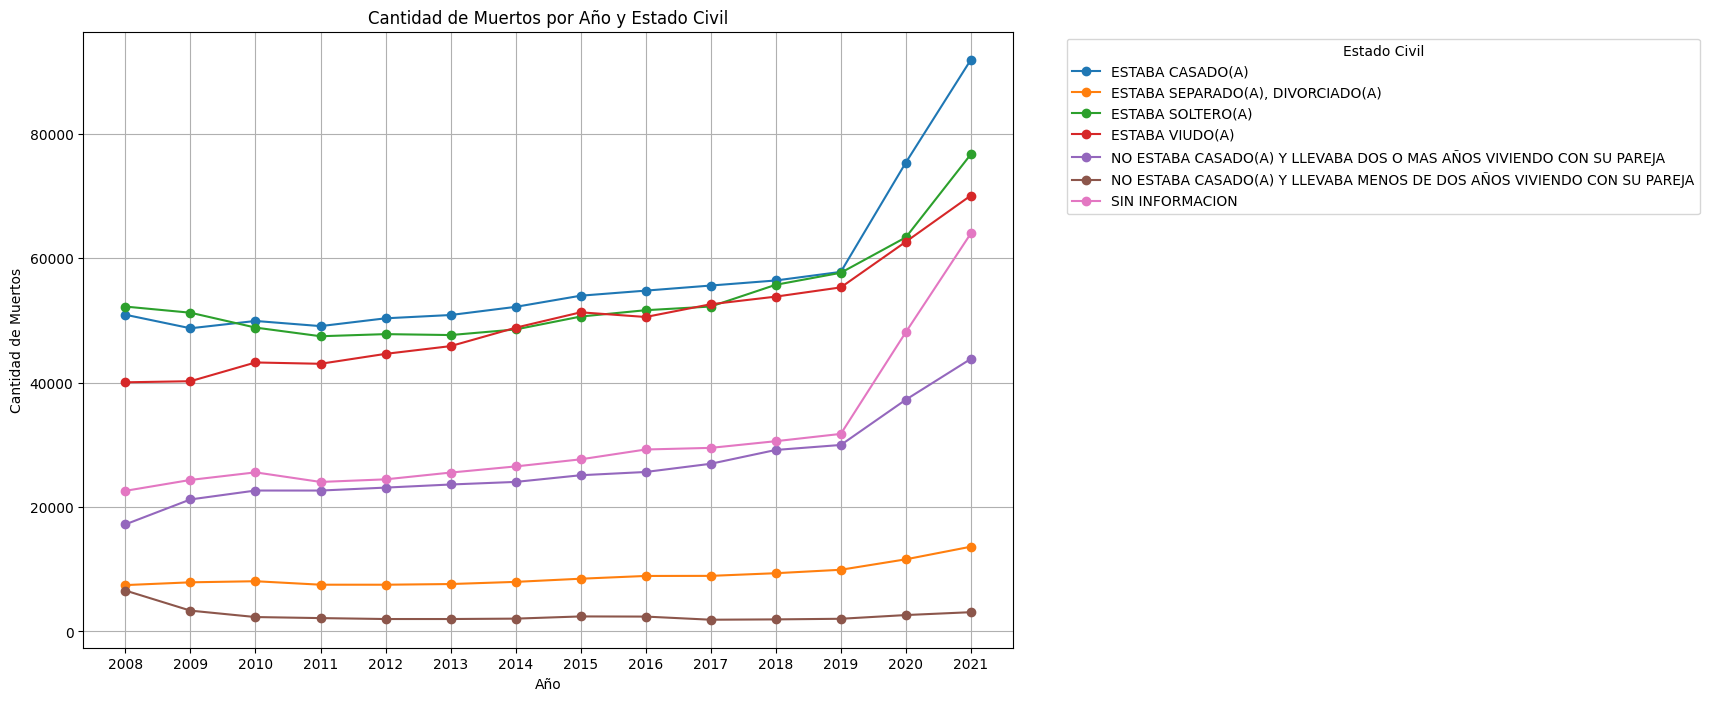

In [14]:
muertos_por_año_est_civil = df_raw.groupby(['ANO', 'EST_CIVIL'])['MES'].count().unstack()

# Crear una gráfica de líneas
plt.figure(figsize=(12, 8))
muertos_por_año_est_civil.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Cantidad de Muertos por Año y Estado Civil')
plt.xlabel('Año')
plt.ylabel('Cantidad de Muertos')
plt.legend(title='Estado Civil', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_raw['ANO'].unique())  # Asegúrate de que todos los años estén representados
plt.grid(True)
plt.show()

Se observa que las personas casado/as, separado/as-divorciado/as y viudo/as tienen mayor número de muertes, además en el 2020 y 2021 hay un gran aumento de personas sin información, aproimandose a los tres estados más representativos.

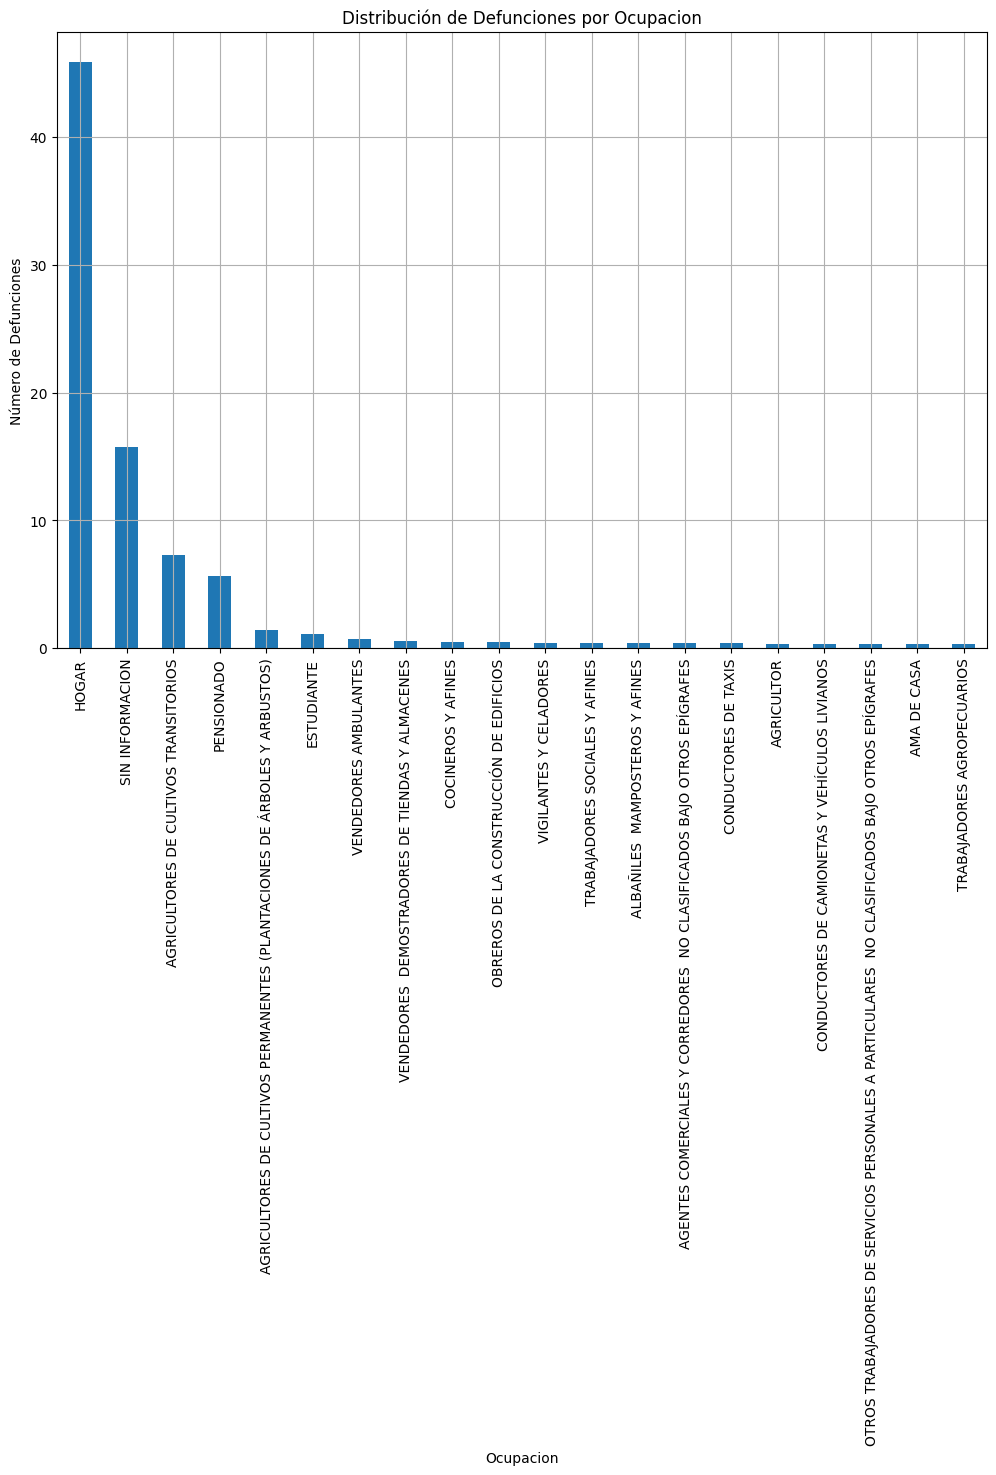

In [15]:
nivel_edu_ocupacion = df_raw['OCUPACION'].value_counts()
nivel_edu_ocupacion = nivel_edu_ocupacion * 100 / nivel_edu_ocupacion.sum()
plt.figure(figsize=(12, 8))
nivel_edu_ocupacion.sort_values(ascending=False)[:20].plot(kind='bar')
plt.title('Distribución de Defunciones por Ocupacion')
plt.xlabel('Ocupacion')
plt.ylabel('Número de Defunciones')
plt.grid()
plt.show()

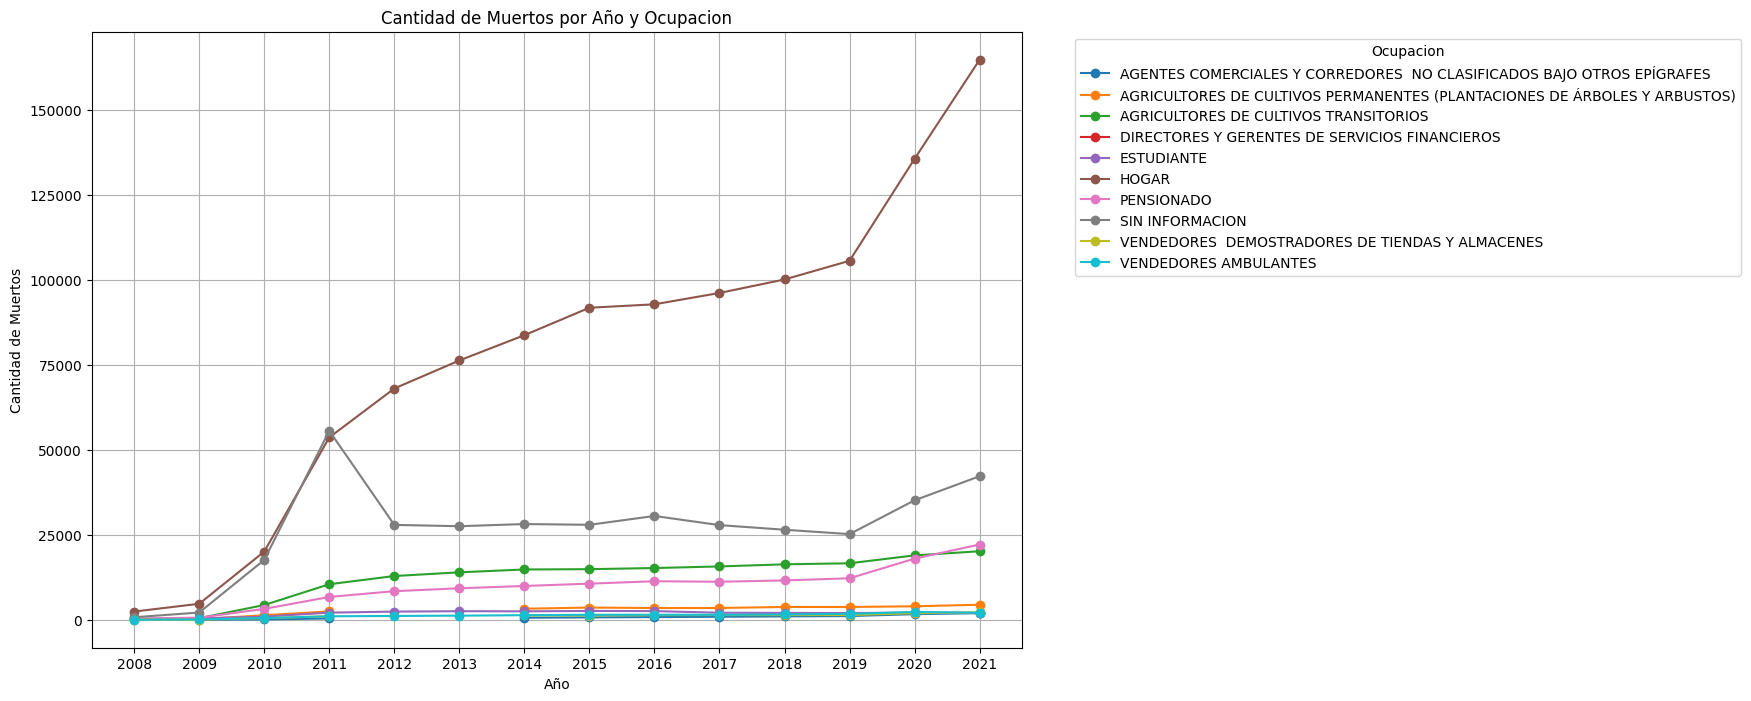

In [16]:
aux = df_raw.groupby(['ANO', 'OCUPACION'])['MES'].count().reset_index()

ocupaciones_lista = aux[aux['ANO'] == 2021].sort_values(by='MES', ascending=False)[:10]['OCUPACION'].values.tolist()

muertos_por_año_ocupacion = df_raw[
    df_raw['OCUPACION'].isin(ocupaciones_lista)
    ].groupby(['ANO', 'OCUPACION'])['MES'].count().unstack()

# Crear una gráfica de líneas
plt.figure(figsize=(12, 8))
muertos_por_año_ocupacion.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Cantidad de Muertos por Año y Ocupacion')
plt.xlabel('Año')
plt.ylabel('Cantidad de Muertos')
plt.legend(title='Ocupacion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_raw['ANO'].unique())  # Asegúrate de que todos los años estén representados
plt.grid(True)
plt.show()

Se observa que la mayoría de muertos tienen como ocupación hogar, sin información, agricultore de cultivos y pensionados.

In [22]:
columnas_c_muerte = ['C_MUERTE', 'C_MUERTEB', 'C_MUERTEC', 'C_MUERTED', 'C_MUERTEE']
columnas_causa = ['NECROPSIA', 'HISTORIA CLINICA', 'PRUEBAS DE LABORATORIO', 'INTERROGATORIO/TESTIGOS', 'SIN INFORMACION']

df_raw.rename(columns=dict(zip(columnas_c_muerte, columnas_causa)), inplace=True)
df_raw.columns

Index(['A_DEFUN', 'SIT_DEFUN', 'TIPO_DEFUN', 'ANO', 'MES', 'HORA', 'MINUTOS',
       'SEXO', 'EST_CIVIL', 'GRU_ED1', 'GRU_ED2', 'NIVEL_EDU', 'ULTCURFAL',
       'MUERTEPORO', 'OCUPACION', 'IDPERTET', 'CODPRES', 'CODPTORE',
       'CODMUNRE', 'AREA_RES', 'SEG_SOCIAL', 'IDADMISALUD', 'PMAN_MUER',
       'CONS_EXP', 'N_HIJOSV', 'N_HIJOSM', 'ULTCURMAD', 'NECROPSIA',
       'HISTORIA CLINICA', 'PRUEBAS DE LABORATORIO', 'INTERROGATORIO/TESTIGOS',
       'SIN INFORMACION', 'ASIS_MED', 'C_DIR1', 'C_ANT1', 'C_BAS1',
       'CAUSA_666', 'CAUSA_667', 'IDPROFCER', 'CAU_HOMOL', 'DEPARTAMENTO',
       'MUNICIPIO'],
      dtype='object')

In [31]:
valores_reemplazar = [['1.0', '0.0', '0', 'Necropsia', 1.0, 0.0],
                    ['0.0', '1.0', '0', 'Historia clÃ\xadnica', 0.0, 1.0],
                    ['0.0', '1.0', '0', 'Pruebas de laboratorio', 0.0, 1.0],
                    ['0.0', '1.0', '0', 'Interrogatorio a familiares o testigos', 0.0, 1.0],
                    [0.0, 1.0, '0', 'Sin informaciÃ³n', '0.0', '1.0']]

valores_remplazo = [[1, 0, 0, 1, 1, 0],
                    [0, 1, 0, 1, 0, 1],
                    [0, 1, 0, 1, 0, 1],
                    [0, 1, 0, 1, 0, 1],
                    [0, 1, 0, 1, 0, 1]]

for valores, remplazo, col in zip(valores_reemplazar, valores_remplazo, columnas_causa):
    print(valores, remplazo, col)
    df_raw[col] = df_raw[col].replace(dict(zip(valores, remplazo)))

['1.0', '0.0', '0', 'Necropsia', 1.0, 0.0] [1, 0, 0, 1, 1, 0] NECROPSIA
['0.0', '1.0', '0', 'Historia clÃ\xadnica', 0.0, 1.0] [0, 1, 0, 1, 0, 1] HISTORIA CLINICA
['0.0', '1.0', '0', 'Pruebas de laboratorio', 0.0, 1.0] [0, 1, 0, 1, 0, 1] PRUEBAS DE LABORATORIO
['0.0', '1.0', '0', 'Interrogatorio a familiares o testigos', 0.0, 1.0] [0, 1, 0, 1, 0, 1] INTERROGATORIO/TESTIGOS
[0.0, 1.0, '0', 'Sin informaciÃ³n', '0.0', '1.0'] [0, 1, 0, 1, 0, 1] SIN INFORMACION


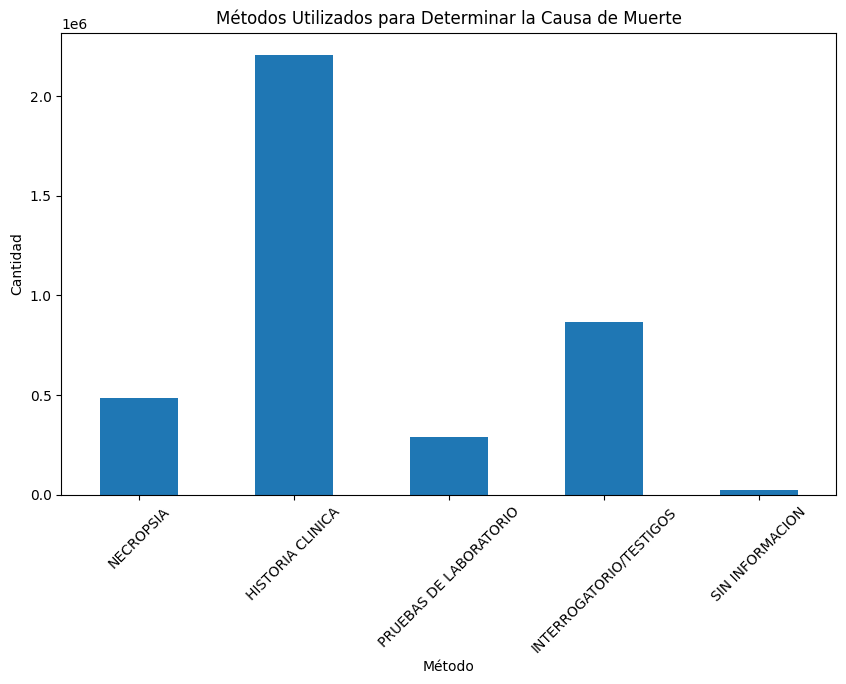

In [34]:
metodos_cuenta = df_raw[columnas_causa].sum()

# Crear una gráfica de barras
plt.figure(figsize=(10, 6))
metodos_cuenta.plot(kind='bar')
plt.title('Métodos Utilizados para Determinar la Causa de Muerte')
plt.xlabel('Método')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)  # Rota los nombres de los métodos para una mejor visualización
plt.show()

<Figure size 1200x800 with 0 Axes>

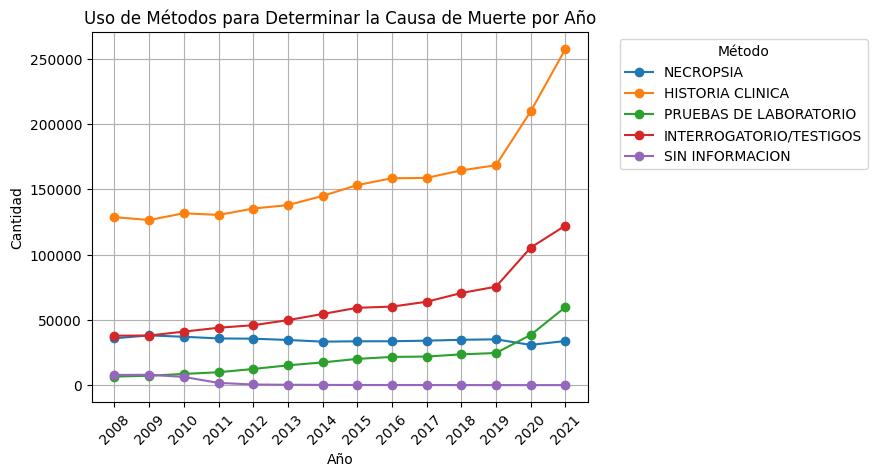

In [36]:
# Agrupar por año y sumar los valores de cada método
metodos_por_ano = df_raw.groupby('ANO')[columnas_causa].sum()

# Crear un gráfico de líneas
plt.figure(figsize=(12, 8))
metodos_por_ano.plot(kind='line', marker='o')
plt.title('Uso de Métodos para Determinar la Causa de Muerte por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(title='Método', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(metodos_por_ano.index, rotation=45)  # Asegúrate de que todos los años estén representados
plt.grid(True)
plt.show()

In [37]:
#df_raw.to_csv('./../data_raw/nofetal2008_2021_4.csv', index=False)

In [ ]:
import pandas as pd
df_raw = pd.read_csv('./../data_raw/nofetal2008_2021_3.csv')
df_raw

Hasta aqui se podria hacer comparacion con otros datos externos como la proyección de la poblacion durante el periodo de análisis o datos como densidad poblacional. Tambien se puede analizar o traer información sobre el desarrollo económico de cada uno de los municipios o departamentos en relación con las muertes.

## Análisis Bi-variado



In [ ]:
df_raw